In [7]:
#installing flygym to use juypternotebook
import os
os.chdir('..')
import sys
path = '/Users/laeti/Documents/EPFL/BA6Projet/flygym_adhesion-Laetitia'# replace 'my_folder' with the name of your folder
path = '/Users/lschwitt/flygym_adhesion-Laetitia'
os.chdir(path)
sys.path.append(path)

In [8]:
os.chdir(path)

In [9]:
os.getcwd()

'c:\\Users\\lschwitt\\flygym_adhesion-Laetitia'

In [10]:
pip install -e ."[mujoco]

Obtaining file:///C:/Users/lschwitt/flygym_adhesion-Laetitia
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 925.5/925.5 kB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 3.2/3.2 MB 11.4 MB/s eta 0:00:00
     ---------------------------------------- 39.3/39.3 MB 9.2 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ------------------------------------- 493.2/493.2 kB 10.3 MB/s eta 0:00:00
     ------------------------------------- 422.5/422.5 kB 13.3 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 11.0 MB/s eta 0:00:00
     ---------------------------------------- 101.3/101.3 kB ? eta 0:00:00
     --------------------------------------- 22.6/22.6 MB 11.3 MB/s eta 0:00:00
     --------------------------------------- 2

In [11]:
import numpy as np
import pkg_resources
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
from flygym.envs.nmf_mujoco import NeuroMechFlyMuJoCo
from tqdm import trange
from flygym.util.config import all_leg_dofs

In [12]:
# Initialize simulation
run_time = 1
nmf = NeuroMechFlyMuJoCo(render_mode='saved',
                         timestep=1e-4,
                         render_config={'playspeed': 0.1, 'camera': 'Animat/camera_left_top'},
                         init_pose='stretch',
                         actuated_joints=all_leg_dofs,
                         actuated_bodies='all')

[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="4000"/>, MJCF Element: <adhesion name="LMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LMTarsus5" gain="4000"/>, MJCF Element: <adhesion name="LHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LHTarsus5" gain="4000"/>, MJCF Element: <adhesion name="RFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RFTarsus5" gain="4000"/>, MJCF Element: <adhesion name="RMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RMTarsus5" gain="4000"/>, MJCF Element: <adhesion name="RHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RHTarsus5" gain="4000"/>] actuators _adhesion
[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="4000"/>, MJCF Element: <adhesion na

In [13]:
# Load recorded data
data_path = Path(pkg_resources.resource_filename('flygym', 'data'))
#with open(data_path / 'behavior' / '210902_pr_fly1.pkl', 'rb') as f:
#    data = pickle.load(f)
with open(data_path / 'behavior' / 'tripod_engineered.pkl', 'rb') as f:
    data = pickle.load(f)

In [14]:
print('Dict keys:', data.keys())
print('Length of time series:', len(data['joint_RFCoxa']))
print('Metadata:', data['meta'])

Dict keys: dict_keys(['meta', 'joint_LFCoxa', 'joint_LFCoxa_roll', 'joint_LFCoxa_yaw', 'joint_LFFemur', 'joint_LFFemur_roll', 'joint_LFTibia', 'joint_LFTarsus1', 'joint_LMCoxa', 'joint_LMCoxa_roll', 'joint_LMCoxa_yaw', 'joint_LMFemur', 'joint_LMFemur_roll', 'joint_LMTibia', 'joint_LMTarsus1', 'joint_LHCoxa', 'joint_LHCoxa_roll', 'joint_LHCoxa_yaw', 'joint_LHFemur', 'joint_LHFemur_roll', 'joint_LHTibia', 'joint_LHTarsus1', 'joint_RFCoxa', 'joint_RFCoxa_roll', 'joint_RFCoxa_yaw', 'joint_RFFemur', 'joint_RFFemur_roll', 'joint_RFTibia', 'joint_RFTarsus1', 'joint_RMCoxa', 'joint_RMCoxa_roll', 'joint_RMCoxa_yaw', 'joint_RMFemur', 'joint_RMFemur_roll', 'joint_RMTibia', 'joint_RMTarsus1', 'joint_RHCoxa', 'joint_RHCoxa_roll', 'joint_RHCoxa_yaw', 'joint_RHFemur', 'joint_RHFemur_roll', 'joint_RHTibia', 'joint_RHTarsus1'])
Length of time series: 12780
Metadata: {'timestep': 0.0001, 'source': 'Analyze_step_data.ipynb'}


In [15]:
# Interpolate 5x recording 
num_steps = int(run_time / nmf.timestep)
data_block = np.zeros((len(nmf.actuated_joints), num_steps))
measure_t = np.arange(len(data['joint_LFCoxa'])) * data['meta']['timestep']
interp_t = np.arange(num_steps) * nmf.timestep
for i, joint in enumerate(nmf.actuated_joints):
    data_block[i, :] = np.interp(interp_t, measure_t, data[joint])

Text(0, 0.5, 'Angle (radian)')

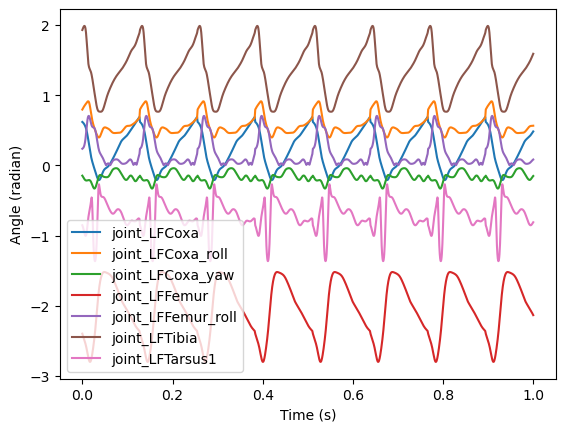

In [16]:
num_joints_to_visualize = 7
plt.plot(np.arange(data_block.shape[1]) * nmf.timestep,
         data_block[:num_joints_to_visualize].T,
         label=nmf.actuated_joints[:num_joints_to_visualize])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angle (radian)')

In [17]:
# Run simulation
obs, info = nmf.reset()

obs_list = [obs]
for i in trange(num_steps):
    joint_pos = data_block[:, i]
    action = {'joints': joint_pos, 'adhesion': obs['bodies_adhesion']}
    obs, info = nmf.step(action)
    nmf.render()
    obs_list.append(obs)

[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="4000"/>, MJCF Element: <adhesion name="LMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LMTarsus5" gain="4000"/>, MJCF Element: <adhesion name="LHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LHTarsus5" gain="4000"/>, MJCF Element: <adhesion name="RFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RFTarsus5" gain="4000"/>, MJCF Element: <adhesion name="RMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RMTarsus5" gain="4000"/>, MJCF Element: <adhesion name="RHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RHTarsus5" gain="4000"/>]


  0%|          | 0/10000 [00:00<?, ?it/s]


KeyError: 'bodies_adhesion'

In [18]:
video_path = Path('kin_replay/video_adh2_tripod2.mp4')
nmf.save_video(video_path)

from ipywidgets import Video
Video.from_file(video_path)

FileNotFoundError: [Errno 2] No such file or directory: 'kin_replay\\video_adh2_tripod2.mp4'

# STATIC:

for i in trange(num_steps):
    joint_pos = data_block[:, i] 

will be:

for i in trange(num_steps):
    joint_pos = data_block[:, 0] 

when we run the simulation

In [19]:
import numpy as np
import pkg_resources
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
from flygym.envs.nmf_mujoco import NeuroMechFlyMuJoCo
from tqdm import trange
from flygym.util.config import all_leg_dofs

In [2]:
# Initialize simulation
run_time = 1
nmf = NeuroMechFlyMuJoCo(render_mode='headless', #no graphic rendering: headless, rendering = 'saved'
                         timestep=1e-4,
                         #render_config={'playspeed': 0.1, 'camera': 'Animat/camera_left_top'},
                         init_pose='stretch',
                         actuated_joints=all_leg_dofs,
                         adhesion = True,
                         actuated_bodies='all')

[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="2500"/>, MJCF Element: <adhesion name="LMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LMTarsus5" gain="2500"/>, MJCF Element: <adhesion name="LHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LHTarsus5" gain="2500"/>, MJCF Element: <adhesion name="RFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RFTarsus5" gain="2500"/>, MJCF Element: <adhesion name="RMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RMTarsus5" gain="2500"/>, MJCF Element: <adhesion name="RHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RHTarsus5" gain="2500"/>] actuators _adhesion
[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="2500"/>, MJCF Element: <adhesion na

In [3]:
# Load recorded data
data_path = Path(pkg_resources.resource_filename('flygym', 'data'))
with open(data_path / 'behavior' / '210902_pr_fly1.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
print('Dict keys:', data.keys())
print('Length of time series:', len(data['joint_RFCoxa']))
print('Metadata:', data['meta'])

Dict keys: dict_keys(['meta', 'joint_LFCoxa_yaw', 'joint_LFCoxa', 'joint_LFCoxa_roll', 'joint_LFFemur', 'joint_LFFemur_roll', 'joint_LFTibia', 'joint_LFTarsus1', 'joint_LMCoxa_yaw', 'joint_LMCoxa', 'joint_LMCoxa_roll', 'joint_LMFemur', 'joint_LMFemur_roll', 'joint_LMTibia', 'joint_LMTarsus1', 'joint_LHCoxa_yaw', 'joint_LHCoxa', 'joint_LHCoxa_roll', 'joint_LHFemur', 'joint_LHFemur_roll', 'joint_LHTibia', 'joint_LHTarsus1', 'joint_RFCoxa_yaw', 'joint_RFCoxa', 'joint_RFCoxa_roll', 'joint_RFFemur', 'joint_RFFemur_roll', 'joint_RFTibia', 'joint_RFTarsus1', 'joint_RMCoxa_yaw', 'joint_RMCoxa', 'joint_RMCoxa_roll', 'joint_RMFemur', 'joint_RMFemur_roll', 'joint_RMTibia', 'joint_RMTarsus1', 'joint_RHCoxa_yaw', 'joint_RHCoxa', 'joint_RHCoxa_roll', 'joint_RHFemur', 'joint_RHFemur_roll', 'joint_RHTibia', 'joint_RHTarsus1'])
Length of time series: 2000
Metadata: {'timestep': 0.0005, 'source_file': '/home/sibwang/Downloads/joint_angles__210902_PR_Fly1.pkl', 'time_range': (3.0, 4.0)}


In [5]:
# Interpolate 5x recording 
num_steps = int(run_time / nmf.timestep)
num_steps = int(run_time/(nmf.timestep)) #to remove *4
data_block = np.zeros((len(nmf.actuated_joints), num_steps))
measure_t = np.arange(len(data['joint_LFCoxa'])) * data['meta']['timestep']
interp_t = np.arange(num_steps) * nmf.timestep
for i, joint in enumerate(nmf.actuated_joints):
    data_block[i, :] = np.interp(interp_t, measure_t, data[joint])

Text(0, 0.5, 'Angle (radian)')

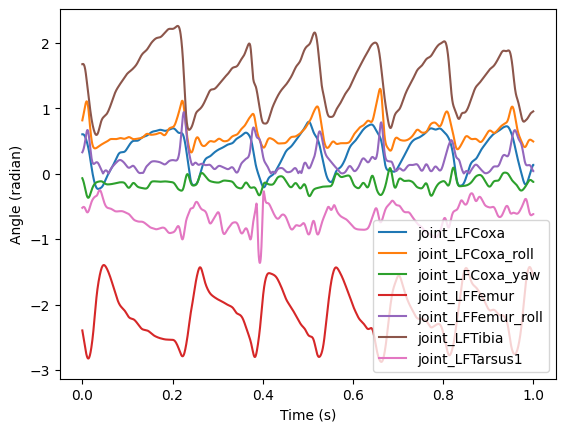

In [6]:
num_joints_to_visualize = 7
plt.plot(np.arange(data_block.shape[1]) * nmf.timestep,
         data_block[:num_joints_to_visualize].T,
         label=nmf.actuated_joints[:num_joints_to_visualize])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angle (radian)')

In [7]:
# Run simulation
obs, info = nmf.reset()

obs_list = [obs]
for i in trange(num_steps):
    if i == int(num_steps/2):
        nmf.physics.model.opt.gravity = (0,0,9.81e5)
    joint_pos = data_block[:, i]
    action = {'joints': joint_pos, 'adhesion': obs['bodies_adhesion']}
    obs, info = nmf.step(action)
    nmf.render()
    obs_list.append(obs)

c:\users\laeti\documents\epfl\ba6projet\flygym_adhesion-laetitia\flygym\envs\nmf_mujoco.py:665: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if f"{body_name}_collision" in (geom1, geom2):


[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="2500"/>, MJCF Element: <adhesion name="LMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LMTarsus5" gain="2500"/>, MJCF Element: <adhesion name="LHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LHTarsus5" gain="2500"/>, MJCF Element: <adhesion name="RFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RFTarsus5" gain="2500"/>, MJCF Element: <adhesion name="RMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RMTarsus5" gain="2500"/>, MJCF Element: <adhesion name="RHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RHTarsus5" gain="2500"/>]


  9%|▉         | 903/10000 [00:05<00:50, 180.00it/s]


KeyboardInterrupt: 

In [8]:
"""
video_path = Path('kin_replay/video_adh_all_gravity_inv_midways_tripod1_continous.mp4')
nmf.save_video(video_path)

from ipywidgets import Video
Video.from_file(video_path)
"""

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x03\xcf%mdat\x00\x…

# Plotting Tarsus Positions across axes 

In [471]:
import numpy as np
import pkg_resources
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
from flygym.envs.nmf_mujoco import NeuroMechFlyMuJoCo
from tqdm import trange
from flygym.util.config import all_leg_dofs

In [541]:
# Initialize simulation
run_time = 1
nmf = NeuroMechFlyMuJoCo(render_mode='headless', #no graphic rendering: headless, rendering = 'saved'
                         timestep=1e-4,
                         #render_config={'playspeed': 0.1, 'camera': 'Animat/camera_left_top'},
                         init_pose='stretch',
                         actuated_joints=all_leg_dofs,
                         adhesion = False,
                         actuators_adhesion_gain =3000,#at 20500 it flies away, at 21000 it stays
                         actuated_bodies='all')

[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="3000"/>, MJCF Element: <adhesion name="LMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LMTarsus5" gain="3000"/>, MJCF Element: <adhesion name="LHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LHTarsus5" gain="3000"/>, MJCF Element: <adhesion name="RFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RFTarsus5" gain="3000"/>, MJCF Element: <adhesion name="RMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RMTarsus5" gain="3000"/>, MJCF Element: <adhesion name="RHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RHTarsus5" gain="3000"/>] actuators _adhesion


In [542]:
# Load recorded data
data_path = Path(pkg_resources.resource_filename('flygym', 'data'))
with open(data_path / 'behavior' / 'tripod_engineered.pkl', 'rb') as f:
    data = pickle.load(f)

In [543]:
# Interpolate 5x recording 
num_steps = int(run_time / nmf.timestep)
data_block = np.zeros((len(nmf.actuated_joints), num_steps))
measure_t = np.arange(len(data['joint_LFCoxa'])) * data['meta']['timestep']
interp_t = np.arange(num_steps) * nmf.timestep
for i, joint in enumerate(nmf.actuated_joints):
    data_block[i, :] = np.interp(interp_t, measure_t, data[joint])

In [544]:
# Run simulation
obs, info = nmf.reset() 
old_obs = obs
obs_list = [obs]
obs_deriv_touch_sensor_Tarsi5 = []
adhesion_obs = []
for i in trange(num_steps):
    deriv_touch_sensor_Tarsi5 = (obs['contact_forces'][4::5]- old_obs['contact_forces'][4::5])/nmf.timestep
    obs_deriv_touch_sensor_Tarsi5.append(deriv_touch_sensor_Tarsi5)
    adhesion_values = []

    if i >= int(num_steps/2):
        #inverting gravity midsimulation
        nmf.physics.model.opt.gravity = (0,0,9.81e5)
        
    for deriv in deriv_touch_sensor_Tarsi5:    
        if deriv >= 0: 
            if i >= int(num_steps/2):
                
                adhesion_values.append(8)
            else:
                adhesion_values.append(1)
        else:
            adhesion_values.append(0)
    joint_pos = data_block[:, i] #put back i 
    #calculate adhesion
    action = {'joints': joint_pos, 'adhesion': adhesion_values} #old version: action = {'joints': joint_pos, 'adhesion': obs['bodies_adhesion']}
    old_obs = obs
    for adh_val in adhesion_values:
        adhesion_obs.append(adh_val)
    obs, info = nmf.step(action)
    
    nmf.render()
    obs_list.append(obs)


100%|██████████| 10000/10000 [00:20<00:00, 482.52it/s]


In [545]:
nmf.actuators_adhesion

[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="3000"/>,
 MJCF Element: <adhesion name="LMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LMTarsus5" gain="3000"/>,
 MJCF Element: <adhesion name="LHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LHTarsus5" gain="3000"/>,
 MJCF Element: <adhesion name="RFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RFTarsus5" gain="3000"/>,
 MJCF Element: <adhesion name="RMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RMTarsus5" gain="3000"/>,
 MJCF Element: <adhesion name="RHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RHTarsus5" gain="3000"/>]

In [546]:
"""video_path = Path('kin_replay/video_dynamics_adh_gravity_inv_midways_gain3000_to300000_tripodpkl.mp4')
nmf.save_video(video_path)

from ipywidgets import Video
Video.from_file(video_path)

"""

"video_path = Path('kin_replay/video_dynamics_adh_gravity_inv_midways_gain3000_to300000_tripodpkl.mp4')\nnmf.save_video(video_path)\n\nfrom ipywidgets import Video\nVideo.from_file(video_path)\n\n"

In [547]:
len(obs['end_effectors'])

18

In [548]:
obs_list[0]['end_effectors']

array([ 2073.38949628,   140.68030985,  1487.44469631, -2127.00269976,
        1184.48397557,  1503.21426628,    30.61927828,  2193.01683175,
        1297.61515485,  2071.5947581 ,  -204.99138534,  1494.01496955,
       -2119.0006488 , -1234.3258386 ,  1503.64598778,    47.42740823,
       -2247.09840987,  1290.64535695])

In [549]:
obs_list[0]['end_effectors'][::3] #only x value

array([ 2073.38949628, -2127.00269976,    30.61927828,  2071.5947581 ,
       -2119.0006488 ,    47.42740823])

In [550]:
obs_list[0]['end_effectors'][1::3] #only y value

array([  140.68030985,  1184.48397557,  2193.01683175,  -204.99138534,
       -1234.3258386 , -2247.09840987])

In [551]:
for z_val_joint in obs_list[0]['end_effectors'][2::3]: #only z value:
    print(z_val_joint)

1487.444696309828
1503.214266277686
1297.6151548450093
1494.0149695479618
1503.645987784245
1290.6453569498194


In [552]:
nmf.end_effector_names

['LFTarsus5', 'LHTarsus5', 'LMTarsus5', 'RFTarsus5', 'RHTarsus5', 'RMTarsus5']

In [575]:
# Create a list to hold the end effector data len(end_effector_data = 18;)
end_effector_data = [[] for _ in range(36)]

# Iterate through each observation in obs_list
for obs in obs_list:
    end_effectors = obs['end_effectors']

    # Iterate through each value in the end_effectors list and append to the corresponding sublist in end_effector_data
    for i, value in enumerate(end_effectors):
        end_effector_data[i].append(value)

end_effector_data = {'x_vals_end_effector_obs' : end_effector_data[::3], 'y_vals_end_effector_obs': end_effector_data[1::3] , 'z_vals_end_effector_obs': end_effector_data[2::3]}

18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
1

In [571]:
len(end_effector_data['x_vals_end_effector_obs'])

12

In [572]:
len(end_effector_data['x_vals_end_effector_obs'][0]) #this denotes the LFTarsus5 x values of the observations over 10001 timesteps

10001

In [573]:
obs_list[0]['end_effectors'][0:3]

array([2073.38949628,  140.68030985, 1487.44469631])

IndexError: list index out of range

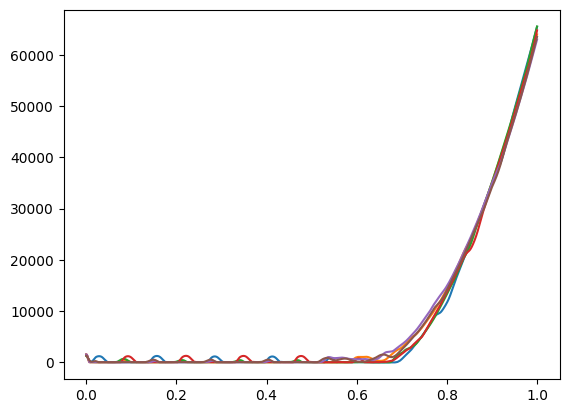

In [574]:
for i, end_effector in enumerate(end_effector_data['z_vals_end_effector_obs']):
    plt.plot(np.arange(len(end_effector)) * nmf.timestep,
        end_effector,
        label=nmf.end_effector_names[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('z- Position end_effectors')


Text(0, 0.5, 'adh_val')

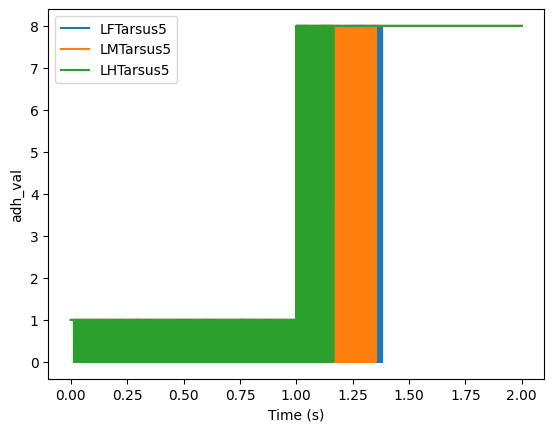

In [567]:

nr_adhesion_bodies = 3 
# nr_adhesion_bodies = 6 if "all"
for i in range(nr_adhesion_bodies):
    plt.plot(np.arange(len(adhesion_obs)/nr_adhesion_bodies) * nmf.timestep,
        adhesion_obs[i::nr_adhesion_bodies],
        label=nmf.actuated_adhesion_bodies[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('adh_val')

IndexError: list index out of range

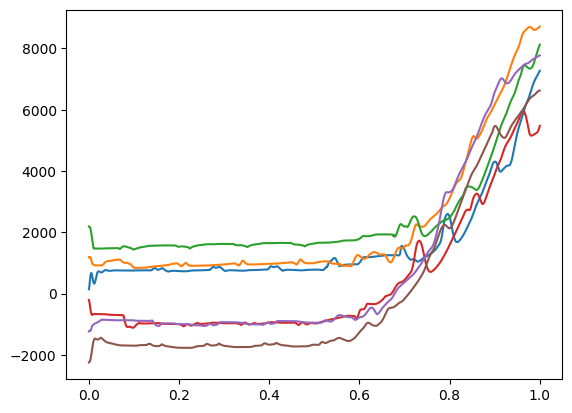

In [568]:
for i, end_effector in enumerate(end_effector_data['y_vals_end_effector_obs']):
    plt.plot(np.arange(len(end_effector)) * nmf.timestep,
        end_effector,
        label=nmf.end_effector_names[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('y- Position end_effectors')



IndexError: list index out of range

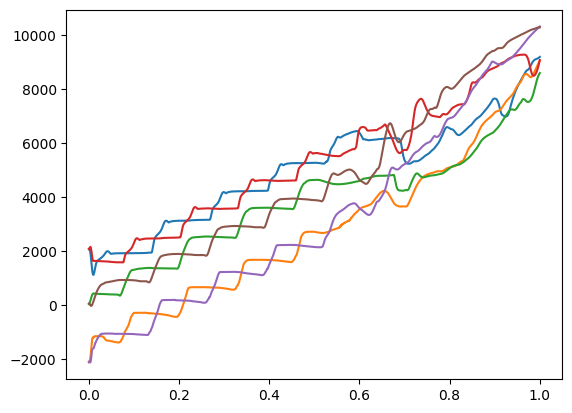

In [569]:
for i, end_effector in enumerate(end_effector_data['x_vals_end_effector_obs']):
    plt.plot(np.arange(len(end_effector)) * nmf.timestep,
        end_effector,
        label=nmf.end_effector_names[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('x- Position end_effectors')



# Plotting the derivative

In [108]:
#formatting the observations obtained from obs_list, that contain the "derivative of the contact forces"
derivative_touch_sensor_data = [[] for _ in range(30)]
for obs in obs_list:
    deriv_touch_sensor = obs['derivative_contact_forces']

    for i, value in enumerate(deriv_touch_sensor):
        derivative_touch_sensor_data[i].append(value)

#as we are currently only interested in the Tarsus5 bodies and not all Tarsus
derivative_touch_sensor_Tarsi5_data = derivative_touch_sensor_data[4::5]

KeyError: 'derivative_contact_forces'

In [25]:
touch_sensor_names = []
for touch_sensors in nmf.touch_sensors:
    touch_sensor_names.append(touch_sensors.name)
print(touch_sensor_names)

['touch_LFTarsus1_collision', 'touch_LFTarsus2_collision', 'touch_LFTarsus3_collision', 'touch_LFTarsus4_collision', 'touch_LFTarsus5_collision', 'touch_LMTarsus1_collision', 'touch_LMTarsus2_collision', 'touch_LMTarsus3_collision', 'touch_LMTarsus4_collision', 'touch_LMTarsus5_collision', 'touch_LHTarsus1_collision', 'touch_LHTarsus2_collision', 'touch_LHTarsus3_collision', 'touch_LHTarsus4_collision', 'touch_LHTarsus5_collision', 'touch_RFTarsus1_collision', 'touch_RFTarsus2_collision', 'touch_RFTarsus3_collision', 'touch_RFTarsus4_collision', 'touch_RFTarsus5_collision', 'touch_RMTarsus1_collision', 'touch_RMTarsus2_collision', 'touch_RMTarsus3_collision', 'touch_RMTarsus4_collision', 'touch_RMTarsus5_collision', 'touch_RHTarsus1_collision', 'touch_RHTarsus2_collision', 'touch_RHTarsus3_collision', 'touch_RHTarsus4_collision', 'touch_RHTarsus5_collision']


In [26]:
touch_sensor_Tarsi5_names = touch_sensor_names[4::5]
print(touch_sensor_Tarsi5_names)

['touch_LFTarsus5_collision', 'touch_LMTarsus5_collision', 'touch_LHTarsus5_collision', 'touch_RFTarsus5_collision', 'touch_RMTarsus5_collision', 'touch_RHTarsus5_collision']


Text(0, 0.5, 'derivative of contact forces for all Tarsi')

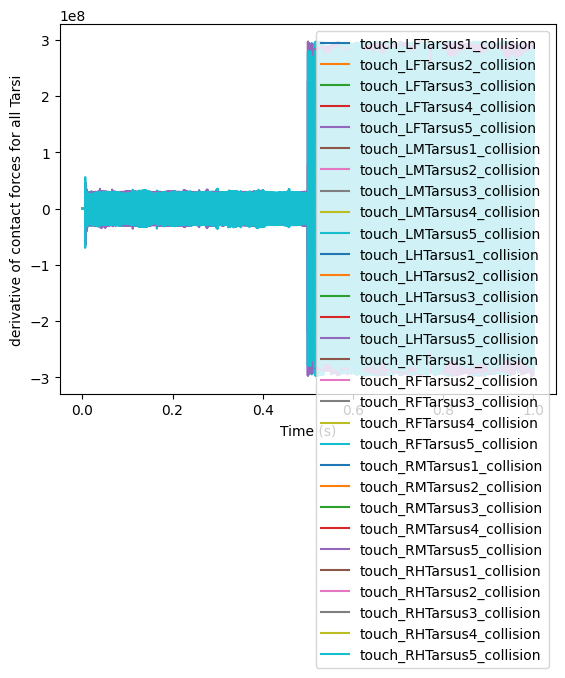

In [27]:
for i, deriv_touch_sensor in enumerate(derivative_touch_sensor_data):
    plt.plot(np.arange(len(deriv_touch_sensor)) * nmf.timestep,
        deriv_touch_sensor,
        label=touch_sensor_names[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('derivative of contact forces for all Tarsi')

10001
10001
10001
10001
10001
10001


Text(0, 0.5, 'derivative of all contact forces for all Tarsi')

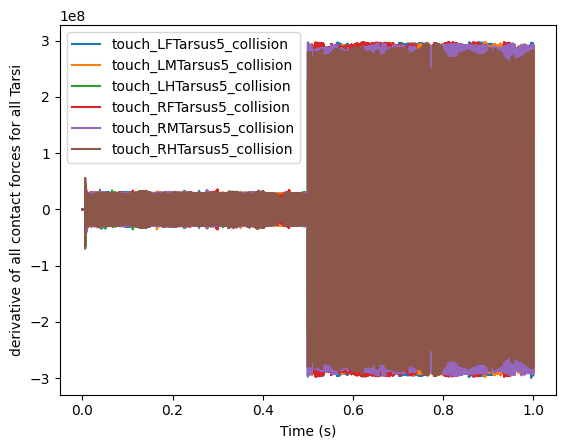

In [28]:
for i, deriv_touch_sensor in enumerate(derivative_touch_sensor_Tarsi5_data):
    plt.plot(np.arange(len(deriv_touch_sensor)) * nmf.timestep,
        deriv_touch_sensor,
        label=touch_sensor_Tarsi5_names[i])
    print(len(deriv_touch_sensor))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('derivative of all contact forces for all Tarsi')

(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


Text(0.5, 1.0, 'Median Filter')

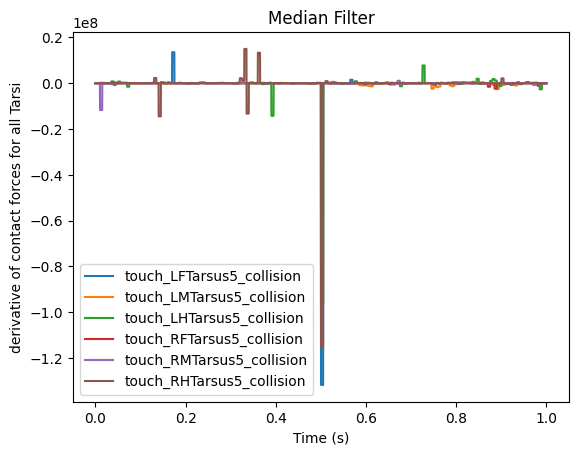

In [29]:
#same plot but using a median filter with window 20. 
window_size = 50
for i, deriv_touch_sensor in enumerate(derivative_touch_sensor_Tarsi5_data):
    # Create an empty list to store the filtered data
    filtered_deriv_touch_sensor = []

    # Iterate over the data in windows of size 'window_size', and replace each window with its median
    for k in range(0, len(deriv_touch_sensor) -1 , window_size):
        window = deriv_touch_sensor[k:k+window_size]
        median = np.median(window)
        filtered_deriv_touch_sensor.extend([median] * window_size)
    print(np.shape(filtered_deriv_touch_sensor))
    plt.plot(np.arange(np.shape(filtered_deriv_touch_sensor)[0]) * nmf.timestep,
        filtered_deriv_touch_sensor,
        label=touch_sensor_Tarsi5_names[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('derivative of contact forces for all Tarsi')
plt.title('Median Filter')


# Plotting the Contact Forces: 

In [30]:
#formatting the observations obtained from obs_list, that contain the "derivative of the contact forces"
touch_sensor_data = [[] for _ in range(30)]
for obs in obs_list:
    touch_sensor = obs['contact_forces']

    for i, value in enumerate(touch_sensor):
        touch_sensor_data[i].append(value)

#as we are currently only interested in the Tarsus5 bodies and not all Tarsus
touch_sensor_Tarsi5_data = touch_sensor_data[4::5]

Text(0, 0.5, 'contact forces for all Tarsi')

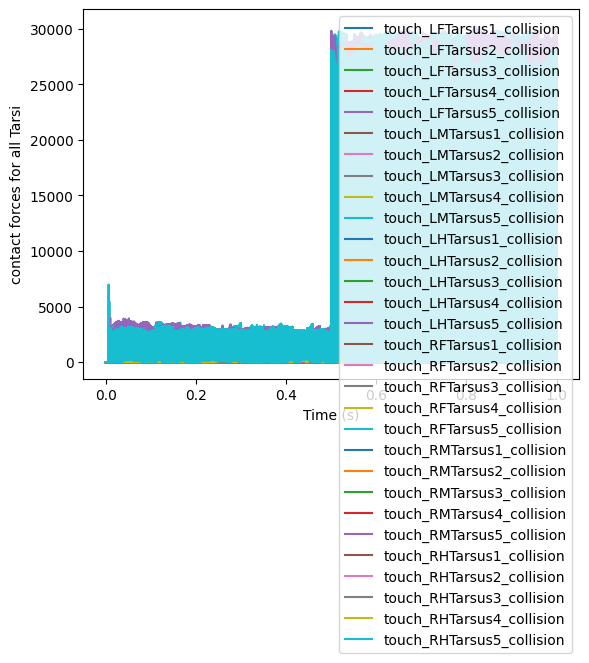

In [31]:
for i, touch_sensor in enumerate(touch_sensor_data):
    plt.plot(np.arange(len(touch_sensor)) * nmf.timestep,
        touch_sensor,
        label=touch_sensor_names[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('contact forces for all Tarsi')

10001
10001
10001
10001
10001
10001


Text(0, 0.5, 'contact forces for all Tarsi')

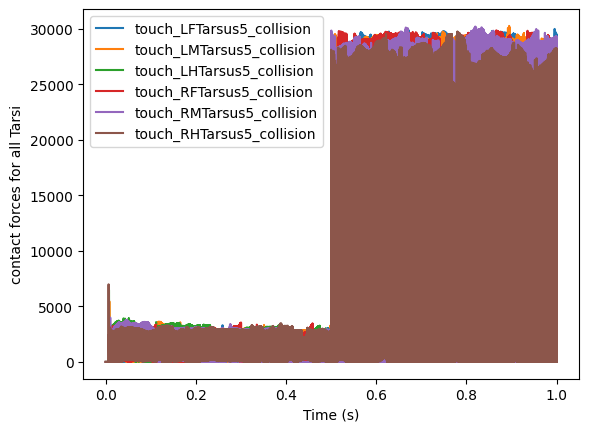

In [32]:
for i, touch_sensor in enumerate(touch_sensor_Tarsi5_data):
    plt.plot(np.arange(len(touch_sensor)) * nmf.timestep,
        touch_sensor,
        #[sensor-5000 for sensor in touch_sensor],
        label=touch_sensor_Tarsi5_names[i])
    print(len(touch_sensor))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('contact forces for all Tarsi')

(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


Text(0.5, 1.0, 'median filter')

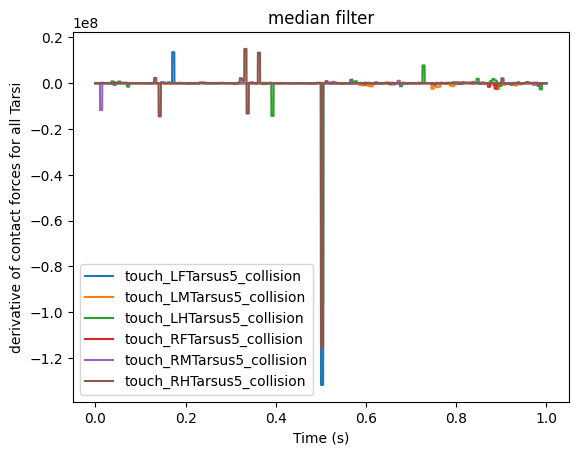

In [33]:
#same plot but using a median filter with window 20. 
for i, deriv_touch_sensor in enumerate(derivative_touch_sensor_Tarsi5_data):
    # Create an empty list to store the filtered data
    filtered_deriv_touch_sensor = []

    # Iterate over the data in windows of size 'window_size', and replace each window with its median
    for k in range(0, len(deriv_touch_sensor) -1 , window_size):
        window = deriv_touch_sensor[k:k+window_size]
        median = np.median(window)
        filtered_deriv_touch_sensor.extend([median] * window_size)
    print(np.shape(filtered_deriv_touch_sensor))
    plt.plot(np.arange(np.shape(filtered_deriv_touch_sensor)[0]) * nmf.timestep,
        filtered_deriv_touch_sensor,
        label=touch_sensor_Tarsi5_names[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('derivative of contact forces for all Tarsi')
plt.title('median filter')


(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


Text(0.5, 1.0, 'mean filter')

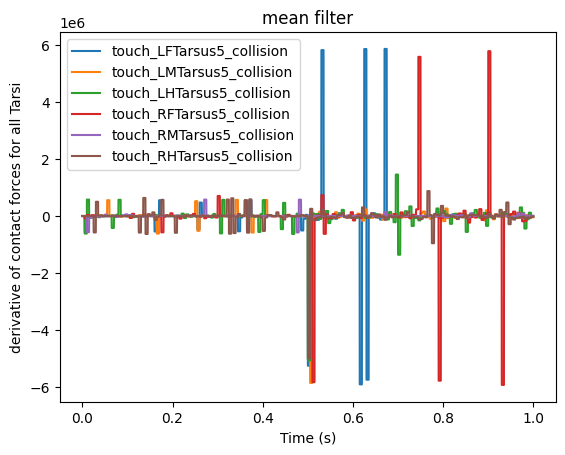

In [34]:
#same plot but using a mean filter with window 20. 
for i, deriv_touch_sensor in enumerate(derivative_touch_sensor_Tarsi5_data):
    # Create an empty list to store the filtered data
    filtered_deriv_touch_sensor = []

    # Iterate over the data in windows of size 'window_size', and replace each window with its median
    for k in range(0, len(deriv_touch_sensor) -1 , window_size):
        window = deriv_touch_sensor[k:k+window_size]
        median = np.mean(window)
        filtered_deriv_touch_sensor.extend([median] * window_size)
    print(np.shape(filtered_deriv_touch_sensor))
    plt.plot(np.arange(np.shape(filtered_deriv_touch_sensor)[0]) * nmf.timestep,
        filtered_deriv_touch_sensor,
        label=touch_sensor_Tarsi5_names[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('derivative of contact forces for all Tarsi')
plt.title('mean filter')


# Contact forces without adhesion

In [68]:
# Initialize simulation
run_time = 1
nmf_no_adhesion = NeuroMechFlyMuJoCo(render_mode='saved', #no graphic rendering: headless, rendering = 'saved'
                         timestep=1e-4,
                         render_config={'playspeed': 0.1, 'camera': 'Animat/camera_left_top'},
                         init_pose='stretch',
                         actuated_joints=all_leg_dofs,
                         adhesion = False,
                         actuators_adhesion_gain =5000,
                         actuated_bodies='all')

[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="5000"/>, MJCF Element: <adhesion name="LMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LMTarsus5" gain="5000"/>, MJCF Element: <adhesion name="LHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LHTarsus5" gain="5000"/>, MJCF Element: <adhesion name="RFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RFTarsus5" gain="5000"/>, MJCF Element: <adhesion name="RMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RMTarsus5" gain="5000"/>, MJCF Element: <adhesion name="RHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RHTarsus5" gain="5000"/>] actuators _adhesion


In [69]:
# Run simulation
obs, info = nmf_no_adhesion.reset()

obs_list = [obs]
for i in trange(num_steps):
    if i == int(num_steps/2):
        nmf_no_adhesion.physics.model.opt.gravity = (0,0,9.81e5)
    joint_pos = data_block[:, i]
    action = {'joints': joint_pos, 'adhesion': obs['bodies_adhesion']}
    obs, info = nmf_no_adhesion.step(action)
    nmf_no_adhesion.render()
    obs_list.append(obs)


100%|██████████| 10000/10000 [02:07<00:00, 78.58it/s]


In [70]:
video_path = Path('kin_replay/video_noADH_all_gravity_inv_midways2.mp4')
nmf.save_video(video_path)

from ipywidgets import Video
Video.from_file(video_path)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x0f\x16\xdemdat\x0…

In [72]:
#formatting the observations obtained from obs_list, that contain the "contact forces"
touch_sensor_data = [[] for _ in range(30)]
for obs in obs_list:
    touch_sensor = obs['contact_forces']

    for i, value in enumerate(touch_sensor):
        touch_sensor_data[i].append(value)

#as we are currently only interested in the Tarsus5 bodies and not all Tarsus
touch_sensor_Tarsi5_data = touch_sensor_data[4::5]

Text(0, 0.5, 'contact forces for all Tarsi')

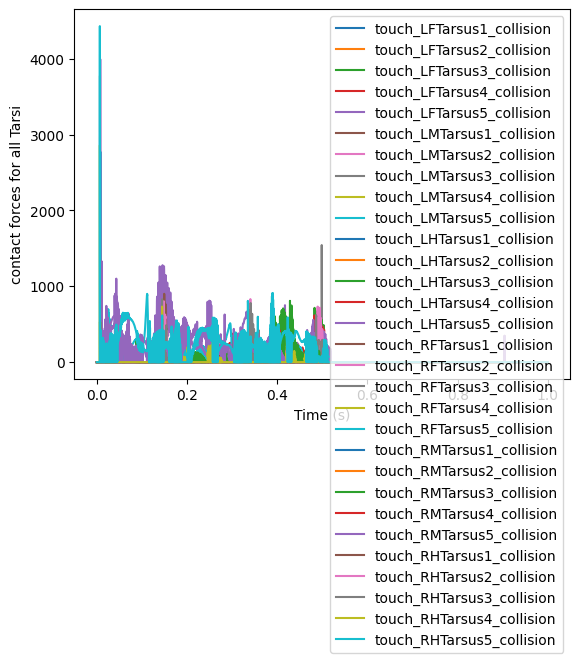

In [73]:
for i, touch_sensor in enumerate(touch_sensor_data):
    plt.plot(np.arange(len(touch_sensor)) * nmf.timestep,
        touch_sensor,
        label=touch_sensor_names[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('contact forces for all Tarsi')

10001
10001
10001
10001
10001
10001


Text(0, 0.5, 'contact forces for all Tarsi')

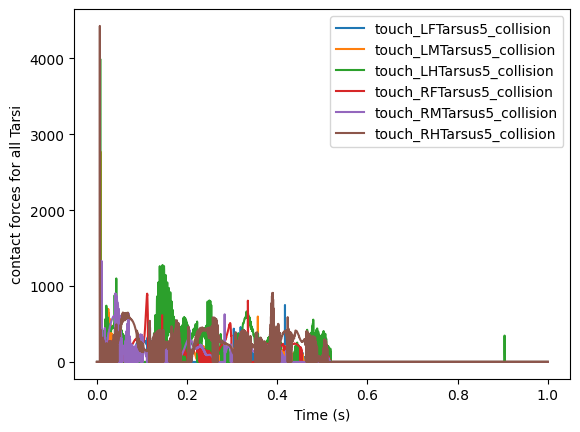

In [74]:
for i, touch_sensor in enumerate(touch_sensor_Tarsi5_data):
    plt.plot(np.arange(len(touch_sensor)) * nmf.timestep,
        touch_sensor,
        label=touch_sensor_Tarsi5_names[i])
    print(len(touch_sensor))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('contact forces for all Tarsi')

(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


Text(0, 0.5, 'contact forces for all Tarsi')

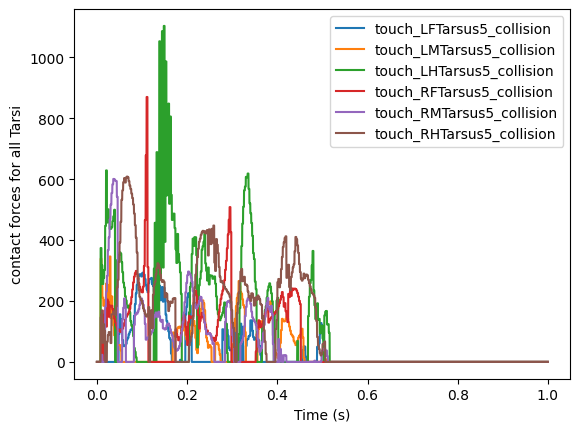

In [75]:
#same plot but using a median filter with window 20. 
window_size = 20
for i, touch_sensor in enumerate(touch_sensor_Tarsi5_data):
    # Create an empty list to store the filtered data
    filtered_touch_sensor = []

    # Iterate over the data in windows of size 'window_size', and replace each window with its median
    for k in range(0, len(touch_sensor) -1 , window_size):
        window = touch_sensor[k:k+window_size]
        median = np.median(window)
        filtered_touch_sensor.extend([median] * window_size)
    print(np.shape(filtered_touch_sensor))
    plt.plot(np.arange(np.shape(filtered_touch_sensor)[0]) * nmf.timestep,
        filtered_touch_sensor,
        label=touch_sensor_Tarsi5_names[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('contact forces for all Tarsi')


(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


Text(0, 0.5, 'contact forces for all Tarsi')

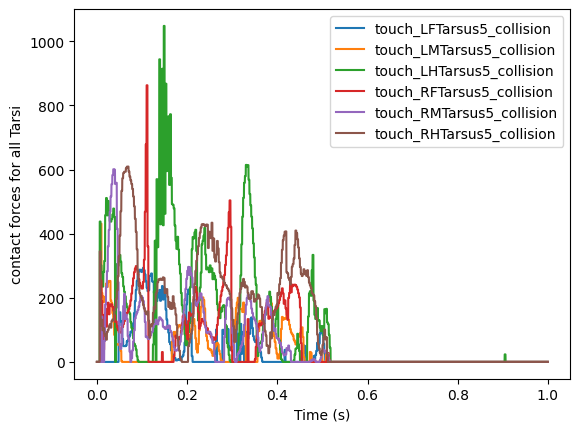

In [76]:
#same plot but using a mean filter with window 20. 
window_size = 20
for i, touch_sensor in enumerate(touch_sensor_Tarsi5_data):
    # Create an empty list to store the filtered data
    filtered_touch_sensor = []

    # Iterate over the data in windows of size 'window_size', and replace each window with its median
    for k in range(0, len(touch_sensor) -1 , window_size):
        window = touch_sensor[k:k+window_size]
        median = np.mean(window)
        filtered_touch_sensor.extend([median] * window_size)
    print(np.shape(filtered_touch_sensor))
    plt.plot(np.arange(np.shape(filtered_touch_sensor)[0]) * nmf.timestep,
        filtered_touch_sensor,
        label=touch_sensor_Tarsi5_names[i])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('contact forces for all Tarsi')

# Junk

In [135]:
len(nmf.touch_sensors)

30

In [138]:
nmf.physics.bind(nmf.touch_sensors).sensordata

SynchronizingArrayWrapper([   0.        ,    0.        ,    0.        ,
                              0.        , 5837.34099137,    0.        ,
                              0.        ,    0.        ,    0.        ,
                           3573.11494349,    0.        ,    0.        ,
                              0.        ,    0.        , 5494.95587276,
                              0.        ,    0.        ,    0.        ,
                              0.        , 3873.12743979,    0.        ,
                              0.        ,    0.        ,    0.        ,
                           5156.96365603,    0.        ,    0.        ,
                              0.        ,    0.        , 5412.0936999 ])

In [137]:
np.array(nmf.physics.bind(nmf.touch_sensors).sensordata)

array([   0.        ,    0.        ,    0.        ,    0.        ,
       5837.34099137,    0.        ,    0.        ,    0.        ,
          0.        , 3573.11494349,    0.        ,    0.        ,
          0.        ,    0.        , 5494.95587276,    0.        ,
          0.        ,    0.        ,    0.        , 3873.12743979,
          0.        ,    0.        ,    0.        ,    0.        ,
       5156.96365603,    0.        ,    0.        ,    0.        ,
          0.        , 5412.0936999 ])

In [130]:
nmf.physics.control()

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.75102903,  0.        ,
        0.        ,  0.34542112,  0.        ,  0.        , -0.38

In [9]:
nmf.physics.data.contact

<_MjContactList
  H: array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
import numpy as np

class FlyModel:
    def __init__(self):
        # Initialize the model and actuators here
        self.actuated_bodies = [
            #name of all adhesion actuators
            f'{side}{pos}{dof}' #TO DO: potentiall its just this for the bodies : f'{side}{pos}{dof}' 
            for side in 'LR'
            for pos in 'FMH'
            for dof in ['Tarsus5']
        ]
        self.actuators_adhesion = []
        for body_name in self.actuated_bodies: 
            self.actuators_adhesion.extend([
                self.model.actuator.add('adhesion', name =f"{body_name}_adhesion", gain="5000", body=body_name, ctrlrange="0 1000000", forcerange="-inf inf") #gain ="500" is too week
            ])
        
        # Initialize contact force and previous contact state
        self.contact_force = {}
        self.prev_contact = {}
        for body_name in self.actuated_bodies:
            self.contact_force[body_name] = 0.0
            self.prev_contact[body_name] = False
            
    def step(self, joint_angles):
        # Set the joint angles for the fly
        # ...
        
        # Reset contact forces to zero
        for body_name in self.actuated_bodies:
            self.contact_force[body_name] = 0.0
            
        # Check for contacts and update contact forces
        for _, contact in self.physics.data.contact:
            geom1 = self.physics.named.model.geom_id2name(contact.geom1)
            geom2 = self.physics.named.model.geom_id2name(contact.geom2)
            for body_name in self.actuated_bodies:
                if f"{body_name}_collision" in (geom1, geom2):
                    if geom1 == f"{body_name}_collision":
                        contact_force = np.linalg.norm(contact.force)
                    else:
                        contact_force = -np.linalg.norm(contact.force)
                        
                    self.contact_force[body_name] += contact_force
                    
        # Update adhesion actuators based on contact forces
        for body_name in self.actuated_bodies:
            if self.contact_force[body_name] > 0 and not self.prev_contact[body_name]:
                # Leg is pushing into floor
                self.actuators_adhesion[self.actuators_adhesion.index(f"{body_name}_adhesion")].ctrl = 1000000
                self.prev_contact[body_name] = True
            elif self.contact_force[body_name] <= 0 and self.prev_contact[body_name]:
                # Leg is lifting off floor
                self.actuators_adhesion[self.actuators_adhesion.index(f"{body_name}_adhesion")].ctrl = 0
                self.prev_contact[body_name] = False


In [20]:
dir(nmf.physics.model.)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_bindings',
 '_contexts',
 '_contexts_lock',
 '_data',
 '_dirty',
 '_free_rendering_contexts',
 '_make_rendering_contexts',
 '_named',
 '_new_warnings',
 '_physics_state_items',
 '_reload_from_data',
 '_reload_from_model',
 '_warnings',
 '_warnings_before',
 '_warnings_cause_exception',
 'activation',
 'after_reset',
 'bind',
 'check_divergence',
 'check_invalid_state',
 'contexts',
 'control',
 'copy',
 'data',
 'enable_profiling',
 'forward',
 'free',
 'from_binary_path',
 'from_byte_string',
 'from_mjcf_model',
 'from_model',
 'from_xml_path',
 'f

In [17]:
nmf.physics.model.actuator('Animat/actuator_position_joint_Head').gainprm 

array([900000.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.])

In [3]:
obs = {
    'joints': np.ndarray,  # NumPy array of shape (3, num_dofs)
                           # the 3 rows are the angle, angular velocity,
                           # and force at each DoF. The order of the
                           # DoFs is the same as ``env.actuated_joints``
    'fly': np.ndarray,  # NumPy array of shape (4, 3)
                        # 0th row: x, y, z position of the fly in arena
                        # 1st row: x, y, z velocity of the fly in arena
                        # 2nd row: orientation of fly around x, y, z axes
                        # 3rd row: rate of change of fly orientation
    #my addition:
    'bodies': np.ndarray, 
}

In [ ]:
action = {
    'joints': np.ndarray,  # NumPy array of shape (num_dofs,)
                           # the order of the DoFs is the same as
                           # ``env.actuated_joints``
}



The meaning of action array depends on the controller type: if position control is used (which is the default case), the array will be interpreted as the target joint angles. If velocity or force control is used, the array will be interpreted as the target velocity or the applied force.